In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Step 2: Load dataset
import pandas as pd

data = pd.read_csv("/IRIS - IRIS.csv.csv")
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (150, 5)
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [ ]:
# separate input features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# encode class labels (string to number)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# one-hot encoding for ANN output
y = tf.keras.utils.to_categorical(y)


In [ ]:
# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [ ]:
# scale the features for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# creating ANN model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.3782 - loss: 1.0131 - val_accuracy: 0.3778 - val_loss: 0.9992
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3723 - loss: 0.9750 - val_accuracy: 0.3778 - val_loss: 0.9631
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3997 - loss: 0.8988 - val_accuracy: 0.3778 - val_loss: 0.9300
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3580 - loss: 0.8926 - val_accuracy: 0.3778 - val_loss: 0.8998
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3983 - loss: 0.8474 - val_accuracy: 0.3778 - val_loss: 0.8723
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3204 - loss: 0.8721 - val_accuracy: 0.5778 - val_loss: 0.8465
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7379 - loss: 0.8031 - val_accuracy: 0.6222 - val_loss: 0.8237
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6666 - loss: 0.8052 - val_accuracy: 0.6444 - val_loss:

In [ ]:
# checking accuracy
train_pred = np.argmax(model.predict(X_train), axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

train_acc = accuracy_score(y_train_true, train_pred)
test_acc = accuracy_score(y_test_true, test_pred)

print("Training Accuracy:", round(train_acc, 3))
print("Testing Accuracy:", round(test_acc, 3))


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 
Training Accuracy: 0.943
Testing Accuracy: 0.844


In [ ]:
# confusion matrix for training and testing
cm_train = confusion_matrix(y_train_true, train_pred)
cm_test = confusion_matrix(y_test_true, test_pred)

print("\nTraining Confusion Matrix:\n", cm_train)
print("\nTesting Confusion Matrix:\n", cm_test)


Training Confusion Matrix:
 [[38  0  0]
 [ 0 30  4]
 [ 0  2 31]]

Testing Confusion Matrix:
 [[12  0  0]
 [ 0 11  5]
 [ 0  2 15]]


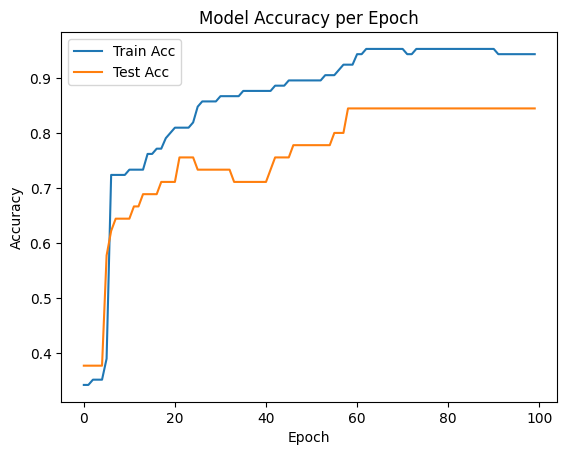

In [ ]:
# plotting accuracy curve
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.title("Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()